In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [2]:
air=pd.read_csv("Air.csv")

In [3]:
air.head()

,Analysis Id,Sample Id,Sample#,Type,Fixed?,Latitude,Longitude,Distance(miles),Bearing,Direction,...,Filter Type,Volume,Volume Unit,Uncertainty%,MDA,Method Code,Moisture%,Nuclide,Result,Unit
0,200609,7233,SCF-00001,Air Filter,No,37.354164,140.322898,39.321527,263.416056,W,...,charcoal,22.0,cubic feet,0.0,4.827416e-12,Gamma Spectroscopy,NaN,Ba-140,0.0,uCi/mL
1,200611,7233,SCF-00001,Air Filter,No,37.354164,140.322898,39.321527,263.416056,W,...,charcoal,22.0,cubic feet,0.0,1.123553e-11,Gamma Spectroscopy,NaN,Ce-144,0.0,uCi/mL
2,200613,7233,SCF-00001,Air Filter,No,37.354164,140.322898,39.321527,263.416056,W,...,charcoal,22.0,cubic feet,0.0,2.790014e-12,Gamma Spectroscopy,NaN,Cs-134,0.0,uCi/mL
3,200615,7233,SCF-00001,Air Filter,No,37.354164,140.322898,39.321527,263.416056,W,...,charcoal,22.0,cubic feet,0.0,7.045142e-12,Gamma Spectroscopy,NaN,Cs-136,0.0,uCi/mL
4,200617,7233,SCF-00001,Air Filter,No,37.354164,140.322898,39.321527,263.416056,W,...,charcoal,22.0,cubic feet,0.0,2.578331e-12,Gamma Spectroscopy,NaN,Cs-137,0.0,uCi/mL


In [4]:
air.shape

(8378, 23)

In [5]:
air.dtypes

Analysis Id          int64
Sample Id            int64
Sample#             object
Type                object
Fixed?              object
Latitude           float64
Longitude          float64
Distance(miles)    float64
Bearing            float64
Direction           object
Collection Date     object
Source              object
Description         object
Filter Type         object
Volume             float64
Volume Unit         object
Uncertainty%       float64
MDA                float64
Method Code         object
Moisture%          float64
Nuclide             object
Result             float64
Unit                object
dtype: object

In [6]:
air.columns

Index(['Analysis Id', 'Sample Id', 'Sample#', 'Type', 'Fixed?', 'Latitude',
       'Longitude', 'Distance(miles)', 'Bearing', 'Direction',
       'Collection Date', 'Source', 'Description', 'Filter Type', 'Volume',
       'Volume Unit', 'Uncertainty%', 'MDA', 'Method Code', 'Moisture%',
       'Nuclide', 'Result', 'Unit'],
      dtype='object')

In [7]:
air['Collection Date'].nunique()

439

In [8]:
air["Collection Date"]

0       3/21/2011 4:54:57 PM
1       3/21/2011 4:54:57 PM
2       3/21/2011 4:54:57 PM
3       3/21/2011 4:54:57 PM
4       3/21/2011 4:54:57 PM
                ...         
8373    3/14/2011 2:00:00 PM
8374    3/14/2011 2:00:00 PM
8375    3/14/2011 2:00:00 PM
8376    3/14/2011 2:00:00 PM
8377    3/14/2011 2:00:00 PM
Name: Collection Date, Length: 8378, dtype: object

In [9]:
air.isnull().sum()

Analysis Id           0
Sample Id             0
Sample#               0
Type                  0
Fixed?                0
Latitude              0
Longitude             0
Distance(miles)       0
Bearing               0
Direction             0
Collection Date       0
Source                0
Description         101
Filter Type           0
Volume             1188
Volume Unit           0
Uncertainty%       1188
MDA                1202
Method Code        1380
Moisture%          8378
Nuclide               0
Result                0
Unit                  0
dtype: int64

In [10]:
air["Moisture%"].nunique()

0

In [11]:
air.drop("Moisture%",axis=1,inplace=True)

In [12]:
air["Sample"].nunique()

604

In [13]:
air.head()

,Analysis Id,Sample Id,Sample#,Type,Fixed?,Latitude,Longitude,Distance(miles),Bearing,Direction,...,Description,Filter Type,Volume,Volume Unit,Uncertainty%,MDA,Method Code,Nuclide,Result,Unit
0,200609,7233,SCF-00001,Air Filter,No,37.354164,140.322898,39.321527,263.416056,W,...,Field Team: Charcoal Paired with SCF-07628 I...,charcoal,22.0,cubic feet,0.0,4.827416e-12,Gamma Spectroscopy,Ba-140,0.0,uCi/mL
1,200611,7233,SCF-00001,Air Filter,No,37.354164,140.322898,39.321527,263.416056,W,...,Field Team: Charcoal Paired with SCF-07628 I...,charcoal,22.0,cubic feet,0.0,1.123553e-11,Gamma Spectroscopy,Ce-144,0.0,uCi/mL
2,200613,7233,SCF-00001,Air Filter,No,37.354164,140.322898,39.321527,263.416056,W,...,Field Team: Charcoal Paired with SCF-07628 I...,charcoal,22.0,cubic feet,0.0,2.790014e-12,Gamma Spectroscopy,Cs-134,0.0,uCi/mL
3,200615,7233,SCF-00001,Air Filter,No,37.354164,140.322898,39.321527,263.416056,W,...,Field Team: Charcoal Paired with SCF-07628 I...,charcoal,22.0,cubic feet,0.0,7.045142e-12,Gamma Spectroscopy,Cs-136,0.0,uCi/mL
4,200617,7233,SCF-00001,Air Filter,No,37.354164,140.322898,39.321527,263.416056,W,...,Field Team: Charcoal Paired with SCF-07628 I...,charcoal,22.0,cubic feet,0.0,2.578331e-12,Gamma Spectroscopy,Cs-137,0.0,uCi/mL


In [14]:
air.dropna(inplace=True)

In [15]:
air.tail(5)

,Analysis Id,Sample Id,Sample#,Type,Fixed?,Latitude,Longitude,Distance(miles),Bearing,Direction,...,Description,Filter Type,Volume,Volume Unit,Uncertainty%,MDA,Method Code,Nuclide,Result,Unit
6993,218885,8661,SCF-08646,Air Filter,No,32.293400,39.672000,5463.624742,302.377144,WNW,...,Description: PAPER;,paper,2993.5,cubic feet,3.502210e-07,4.795506e-07,GP Counting,Sr-Total,0.000002,uCi
6994,218887,8661,SCF-08646,Air Filter,No,32.293400,39.672000,5463.624742,302.377144,WNW,...,Description: PAPER;,paper,2993.5,cubic feet,4.758487e-07,4.795506e-07,GP Counting,Sr-89,0.000002,uCi
6995,218889,7087,SCF-08988,Air Filter,No,35.668706,139.743285,140.531810,210.966723,SSW,...,Field Team: Embassy Roof High Vol I-132 (2.3h...,Hi-vol,14896.0,cubic feet,4.401873e-07,5.586493e-07,GP Counting,Sr-90,0.000002,uCi
6996,218891,7087,SCF-08988,Air Filter,No,35.668706,139.743285,140.531810,210.966723,SSW,...,Field Team: Embassy Roof High Vol I-132 (2.3h...,Hi-vol,14896.0,cubic feet,7.080533e-07,5.586493e-07,GP Counting,Sr-Total,0.000008,uCi
6997,218893,7087,SCF-08988,Air Filter,No,35.668706,139.743285,140.531810,210.966723,SSW,...,Field Team: Embassy Roof High Vol I-132 (2.3h...,Hi-vol,14896.0,cubic feet,4.401873e-07,5.586493e-07,GP Counting,Sr-89,0.000016,uCi


In [16]:
air.isnull().sum()

Analysis Id        0
Sample Id          0
Sample#            0
Type               0
Fixed?             0
Latitude           0
Longitude          0
Distance(miles)    0
Bearing            0
Direction          0
Collection Date    0
Source             0
Description        0
Filter Type        0
Volume             0
Volume Unit        0
Uncertainty%       0
MDA                0
Method Code        0
Nuclide            0
Result             0
Unit               0
dtype: int64

In [17]:
air["Type"].nunique()

1

In [18]:
air["Direction"].unique()

array(['W', 'WSW', 'SSW', 'SW', 'N', 'NNW', 'WNW', 'NW', 'NNE', 'S',
       'ENE'], dtype=object)

In [19]:
air["Source"].nunique()

1

In [20]:
air["Description"].nunique()

388

In [21]:
air["Description"].head(1)

0    Field Team: Charcoal  Paired with SCF-07628  I...
Name: Description, dtype: object

In [22]:
pd.options.display.max_columns=23
pd.options.display.max_rows=4
air


,Analysis Id,Sample Id,Sample#,Type,Fixed?,Latitude,Longitude,Distance(miles),Bearing,Direction,Collection Date,Source,Description,Filter Type,Volume,Volume Unit,Uncertainty%,MDA,Method Code,Nuclide,Result,Unit
0,200609,7233,SCF-00001,Air Filter,No,37.354164,140.322898,39.321527,263.416056,W,3/21/2011 4:54:57 PM,DOE,Field Team: Charcoal Paired with SCF-07628 I...,charcoal,22.0,cubic feet,0.000000e+00,4.827416e-12,Gamma Spectroscopy,Ba-140,0.000000,uCi/mL
1,200611,7233,SCF-00001,Air Filter,No,37.354164,140.322898,39.321527,263.416056,W,3/21/2011 4:54:57 PM,DOE,Field Team: Charcoal Paired with SCF-07628 I...,charcoal,22.0,cubic feet,0.000000e+00,1.123553e-11,Gamma Spectroscopy,Ce-144,0.000000,uCi/mL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6996,218891,7087,SCF-08988,Air Filter,No,35.668706,139.743285,140.531810,210.966723,SSW,3/18/2011 2:05:28 PM,DOE,Field Team: Embassy Roof High Vol I-132 (2.3h...,Hi-vol,14896.0,cubic feet,7.080533e-07,5.586493e-07,GP Counting,Sr-Total,0.000008,uCi
6997,218893,7087,SCF-08988,Air Filter,No,35.668706,139.743285,140.531810,210.966723,SSW,3/18/2011 2:05:28 PM,DOE,Field Team: Embassy Roof High Vol I-132 (2.3h...,Hi-vol,14896.0,cubic feet,4.401873e-07,5.586493e-07,GP Counting,Sr-89,0.000016,uCi


In [23]:
air.isnull().sum()

Analysis Id    0
Sample Id      0
              ..
Result         0
Unit           0
Length: 22, dtype: int64

In [56]:
air.drop("Description",inplace=True,axis=1)

In [24]:
air.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6889 entries, 0 to 6997
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Analysis Id      6889 non-null   int64  
 1   Sample Id        6889 non-null   int64  
 2   Sample#          6889 non-null   object 
 3   Type             6889 non-null   object 
 4   Fixed?           6889 non-null   object 
 5   Latitude         6889 non-null   float64
 6   Longitude        6889 non-null   float64
 7   Distance(miles)  6889 non-null   float64
 8   Bearing          6889 non-null   float64
 9   Direction        6889 non-null   object 
 10  Collection Date  6889 non-null   object 
 11  Source           6889 non-null   object 
 12  Description      6889 non-null   object 
 13  Filter Type      6889 non-null   object 
 14  Volume           6889 non-null   float64
 15  Volume Unit      6889 non-null   object 
 16  Uncertainty%     6889 non-null   float64
 17  MDA           

In [25]:
def change_datetime(column):
    air[column]=pd.to_datetime(air[column],infer_datetime_format=True)

In [26]:
for i in["Collection Date"]:
    change_datetime(i)
  

In [27]:
air["Collection_Date"]=air["Collection Date"].dt.day

In [28]:
air["Collection_month"]=air["Collection Date"].dt.month
air["Collection_hour"]=air["Collection Date"].dt.hour
air["Collection_minute"]=air["Collection Date"].dt.minute
air["Collection_sec"]=air["Collection Date"].dt.second

In [29]:
air.dtypes

Analysis Id          int64
Sample Id            int64
                     ...  
Collection_minute    int64
Collection_sec       int64
Length: 27, dtype: object

In [30]:
air.head(3)

,Analysis Id,Sample Id,Sample#,Type,Fixed?,Latitude,Longitude,Distance(miles),Bearing,Direction,Collection Date,...,Uncertainty%,MDA,Method Code,Nuclide,Result,Unit,Collection_Date,Collection_month,Collection_hour,Collection_minute,Collection_sec
0,200609,7233,SCF-00001,Air Filter,No,37.354164,140.322898,39.321527,263.416056,W,2011-03-21 16:54:57,...,0.0,4.827416e-12,Gamma Spectroscopy,Ba-140,0.0,uCi/mL,21,3,16,54,57
1,200611,7233,SCF-00001,Air Filter,No,37.354164,140.322898,39.321527,263.416056,W,2011-03-21 16:54:57,...,0.0,1.123553e-11,Gamma Spectroscopy,Ce-144,0.0,uCi/mL,21,3,16,54,57
2,200613,7233,SCF-00001,Air Filter,No,37.354164,140.322898,39.321527,263.416056,W,2011-03-21 16:54:57,...,0.0,2.790014e-12,Gamma Spectroscopy,Cs-134,0.0,uCi/mL,21,3,16,54,57


In [31]:
air.drop("Collection Date",axis=1,inplace=True)

In [32]:
air.columns

Index(['Analysis Id', 'Sample Id', 'Sample#', 'Type', 'Fixed?', 'Latitude',
       'Longitude', 'Distance(miles)', 'Bearing', 'Direction', 'Source',
       'Description', 'Filter Type', 'Volume', 'Volume Unit', 'Uncertainty%',
       'MDA', 'Method Code', 'Nuclide', 'Result', 'Unit', 'Collection_Date',
       'Collection_month', 'Collection_hour', 'Collection_minute',
       'Collection_sec'],
      dtype='object')

In [33]:
air["Method Code"].nunique()

3

In [34]:
air['Filter Type'].nunique()

5

In [35]:
air['Result']=air['Result'].astype(float)

In [36]:
air.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6889 entries, 0 to 6997
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Analysis Id        6889 non-null   int64  
 1   Sample Id          6889 non-null   int64  
 2   Sample#            6889 non-null   object 
 3   Type               6889 non-null   object 
 4   Fixed?             6889 non-null   object 
 5   Latitude           6889 non-null   float64
 6   Longitude          6889 non-null   float64
 7   Distance(miles)    6889 non-null   float64
 8   Bearing            6889 non-null   float64
 9   Direction          6889 non-null   object 
 10  Source             6889 non-null   object 
 11  Description        6889 non-null   object 
 12  Filter Type        6889 non-null   object 
 13  Volume             6889 non-null   float64
 14  Volume Unit        6889 non-null   object 
 15  Uncertainty%       6889 non-null   float64
 16  MDA                6889 

<Axes: xlabel='Direction', ylabel='Filter Type'>

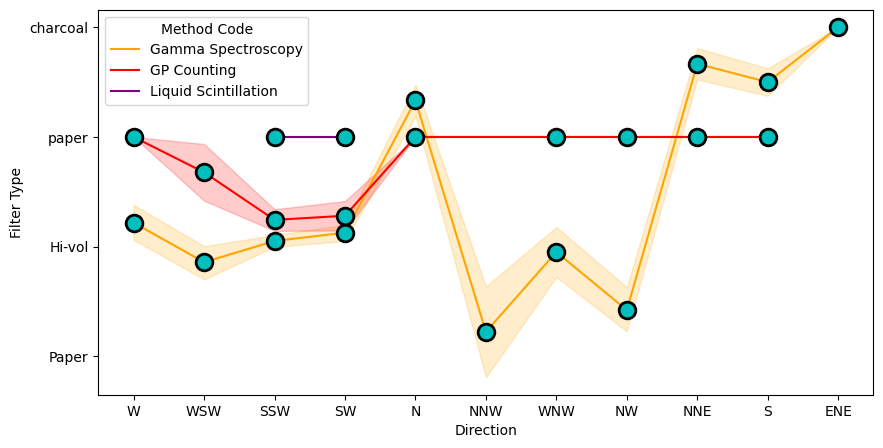

In [37]:
plt.figure(figsize=(10,5))
sns.lineplot(x=air['Direction'],y=air['Filter Type'],hue=air["Method Code"],palette=['orange','red','purple'],marker='o',
             mew=2,mfc='c',mec='k',ms=12)


<Axes: xlabel='Method Code', ylabel='count'>

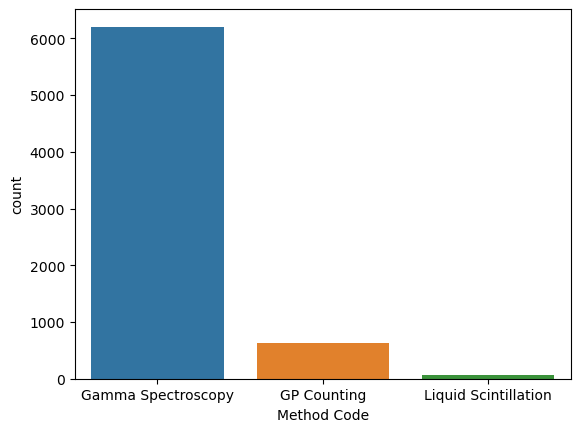

In [38]:
sns.countplot(x=air["Method Code"])

<BarContainer object of 6889 artists>

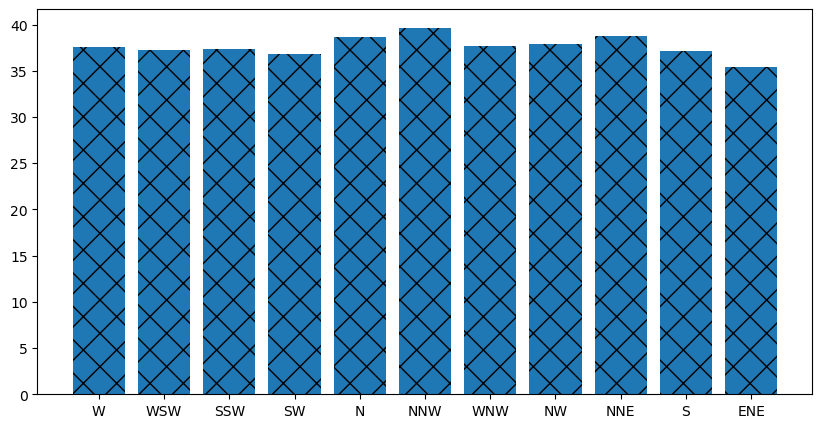

In [39]:
plt.figure(figsize=(10,5))
plt.bar(air['Direction'],air['Latitude'],hatch="x")

<Axes: xlabel='Direction', ylabel='Count'>

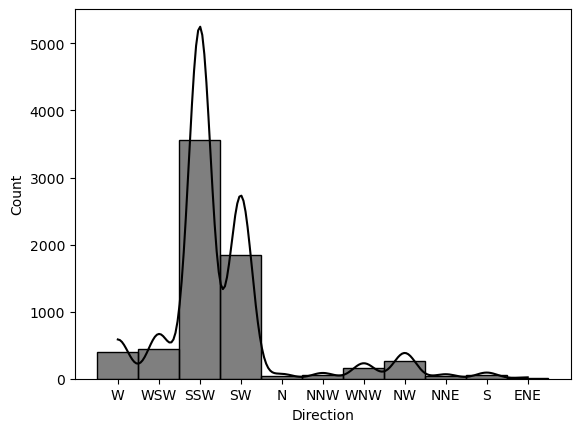

In [40]:
sns.histplot(x=air["Direction"],kde=True,color="black")

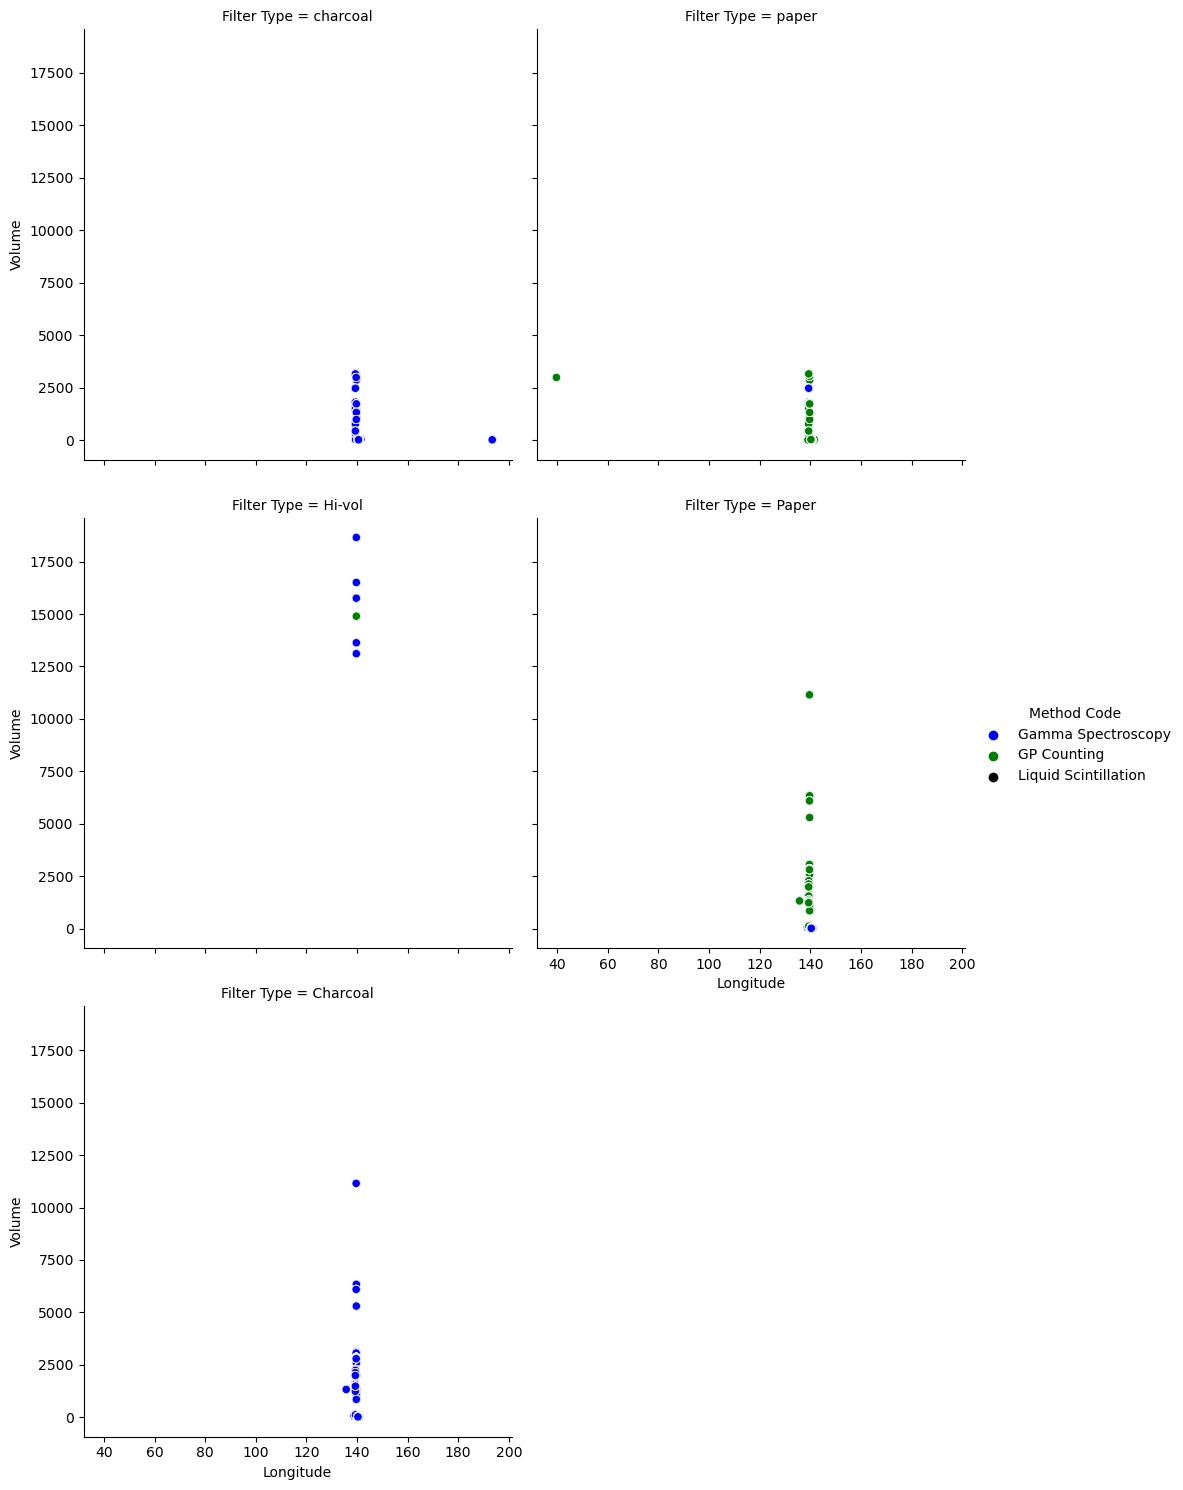

In [42]:
sns.relplot(x=air['Longitude'],y=air['Volume'],col=air['Filter Type'],hue=air["Method Code"],palette=["blue",'green','black']
           ,col_wrap=2)

In [43]:
air.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6889 entries, 0 to 6997
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Analysis Id        6889 non-null   int64  
 1   Sample Id          6889 non-null   int64  
 2   Sample#            6889 non-null   object 
 3   Type               6889 non-null   object 
 4   Fixed?             6889 non-null   object 
 5   Latitude           6889 non-null   float64
 6   Longitude          6889 non-null   float64
 7   Distance(miles)    6889 non-null   float64
 8   Bearing            6889 non-null   float64
 9   Direction          6889 non-null   object 
 10  Source             6889 non-null   object 
 11  Description        6889 non-null   object 
 12  Filter Type        6889 non-null   object 
 13  Volume             6889 non-null   float64
 14  Volume Unit        6889 non-null   object 
 15  Uncertainty%       6889 non-null   float64
 16  MDA                6889 

In [44]:
dic={"No":0,"Yes":1}

In [45]:
air["Fixed"]=air["Fixed?"].map(dic)

In [46]:
air["Fixed"]

0       0
1       0
       ..
6996    0
6997    0
Name: Fixed, Length: 6889, dtype: int64

In [47]:
air.drop("Fixed?",inplace=True,axis=1)

In [48]:
air["Unit"].unique()

array(['uCi/mL', 'uCi'], dtype=object)

In [57]:
cat_data=[columns for columns in air.columns if air[columns].dtypes=="O"]

In [58]:
cont_data=[columns for columns in air.columns if air[columns].dtypes!="O"]

In [59]:
cont_data

['Analysis Id',
 'Sample Id',
 'Latitude',
 'Longitude',
 'Distance(miles)',
 'Bearing',
 'Volume',
 'Uncertainty%',
 'MDA',
 'Result',
 'Collection_Date',
 'Collection_month',
 'Collection_hour',
 'Collection_minute',
 'Collection_sec',
 'Fixed']

In [60]:
cat_data=air[cat_data]

In [61]:
cat_data

,Sample#,Type,Direction,Source,Filter Type,Volume Unit,Method Code,Nuclide,Unit
0,SCF-00001,Air Filter,W,DOE,charcoal,cubic feet,Gamma Spectroscopy,Ba-140,uCi/mL
1,SCF-00001,Air Filter,W,DOE,charcoal,cubic feet,Gamma Spectroscopy,Ce-144,uCi/mL
...,...,...,...,...,...,...,...,...,...
6996,SCF-08988,Air Filter,SSW,DOE,Hi-vol,cubic feet,GP Counting,Sr-Total,uCi
6997,SCF-08988,Air Filter,SSW,DOE,Hi-vol,cubic feet,GP Counting,Sr-89,uCi


In [62]:
cont_data=air[cont_data]

In [63]:
cont_data

,Analysis Id,Sample Id,Latitude,Longitude,Distance(miles),Bearing,Volume,Uncertainty%,MDA,Result,Collection_Date,Collection_month,Collection_hour,Collection_minute,Collection_sec,Fixed
0,200609,7233,37.354164,140.322898,39.321527,263.416056,22.0,0.000000e+00,4.827416e-12,0.000000,21,3,16,54,57,0
1,200611,7233,37.354164,140.322898,39.321527,263.416056,22.0,0.000000e+00,1.123553e-11,0.000000,21,3,16,54,57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6996,218891,7087,35.668706,139.743285,140.531810,210.966723,14896.0,7.080533e-07,5.586493e-07,0.000008,18,3,14,5,28,0
6997,218893,7087,35.668706,139.743285,140.531810,210.966723,14896.0,4.401873e-07,5.586493e-07,0.000016,18,3,14,5,28,0


In [64]:
Type=pd.get_dummies(cat_data["Type"],drop_first=True)

In [65]:
Type.head(2)

""
0
1


In [66]:
cat_data.head(2)

,Sample#,Type,Direction,Source,Filter Type,Volume Unit,Method Code,Nuclide,Unit
0,SCF-00001,Air Filter,W,DOE,charcoal,cubic feet,Gamma Spectroscopy,Ba-140,uCi/mL
1,SCF-00001,Air Filter,W,DOE,charcoal,cubic feet,Gamma Spectroscopy,Ce-144,uCi/mL


In [67]:
Direction=pd.get_dummies(cat_data["Direction"],drop_first=True)

In [68]:
Filter_Type=pd.get_dummies(cat_data["Filter Type"],drop_first=True)

In [69]:
Volume_Unit=pd.get_dummies(cat_data["Volume Unit"],drop_first=True)



In [70]:
Method_Code=pd.get_dummies(cat_data["Method Code"],drop_first=True)

In [71]:
Unit=pd.get_dummies(cat_data["Unit"],drop_first=True)

In [72]:
cat_data["Nuclide"].nunique()

26

In [73]:
Method_Code.head(3)

,Gamma Spectroscopy,Liquid Scintillation
0,1,0
1,1,0
2,1,0


In [74]:
Filter_Type.head(4)

,Hi-vol,Paper,charcoal,paper
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0


In [75]:
new_data=pd.concat([cont_data,Type,Direction,Filter_Type,Volume_Unit,Method_Code,Unit],axis=1)

In [76]:

pd.options.display.max_columns=35

In [77]:
new_data.head(3)

,Analysis Id,Sample Id,Latitude,Longitude,Distance(miles),Bearing,Volume,Uncertainty%,MDA,Result,Collection_Date,Collection_month,Collection_hour,Collection_minute,Collection_sec,Fixed,N,NNE,NNW,NW,S,SSW,SW,W,WNW,WSW,Hi-vol,Paper,charcoal,paper,cubic feet,cubic feet/minute,Gamma Spectroscopy,Liquid Scintillation,uCi/mL
0,200609,7233,37.354164,140.322898,39.321527,263.416056,22.0,0.0,4.827416e-12,0.0,21,3,16,54,57,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1
1,200611,7233,37.354164,140.322898,39.321527,263.416056,22.0,0.0,1.123553e-11,0.0,21,3,16,54,57,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1
2,200613,7233,37.354164,140.322898,39.321527,263.416056,22.0,0.0,2.790014e-12,0.0,21,3,16,54,57,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1


In [78]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6889 entries, 0 to 6997
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Analysis Id           6889 non-null   int64  
 1   Sample Id             6889 non-null   int64  
 2   Latitude              6889 non-null   float64
 3   Longitude             6889 non-null   float64
 4   Distance(miles)       6889 non-null   float64
 5   Bearing               6889 non-null   float64
 6   Volume                6889 non-null   float64
 7   Uncertainty%          6889 non-null   float64
 8   MDA                   6889 non-null   float64
 9   Result                6889 non-null   float64
 10  Collection_Date       6889 non-null   int64  
 11  Collection_month      6889 non-null   int64  
 12  Collection_hour       6889 non-null   int64  
 13  Collection_minute     6889 non-null   int64  
 14  Collection_sec        6889 non-null   int64  
 15  Fixed                

In [79]:
new_data["N"]=new_data["N"].astype(int)

In [80]:
new_data["N"]=new_data["N"].astype(int)
new_data["NNE"]=new_data["NNE"].astype(int)
new_data["NNW"]=new_data["NNW"].astype(int)
new_data["NW"]=new_data["NW"].astype(int)
new_data["S"]=new_data["S"].astype(int)
new_data["SSW"]=new_data["SSW"].astype(int)
new_data["SW"]=new_data["SW"].astype(int)
new_data["WNW"]=new_data["WNW"].astype(int)
new_data["WSW"]=new_data["WSW"].astype(int)
new_data["Hi-vol"]=new_data["Hi-vol"].astype(int)
new_data["Paper"]=new_data["Paper"].astype(int)
new_data["charcoal"]=new_data["charcoal"].astype(int)
new_data["paper"]=new_data["paper"].astype(int)
new_data["cubic feet"]=new_data["cubic feet"].astype(int)
new_data["cubic feet/minute"]=new_data["cubic feet/minute"].astype(int)
new_data["Gamma Spectroscopy"]=new_data["Gamma Spectroscopy"].astype(int)
new_data["Liquid Scintillation"]=new_data["Liquid Scintillation"].astype(int)
new_data["uCi/mL"]=new_data["uCi/mL"].astype(int)
new_data["WNW"]=new_data["WNW"].astype(int)



In [81]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6889 entries, 0 to 6997
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Analysis Id           6889 non-null   int64  
 1   Sample Id             6889 non-null   int64  
 2   Latitude              6889 non-null   float64
 3   Longitude             6889 non-null   float64
 4   Distance(miles)       6889 non-null   float64
 5   Bearing               6889 non-null   float64
 6   Volume                6889 non-null   float64
 7   Uncertainty%          6889 non-null   float64
 8   MDA                   6889 non-null   float64
 9   Result                6889 non-null   float64
 10  Collection_Date       6889 non-null   int64  
 11  Collection_month      6889 non-null   int64  
 12  Collection_hour       6889 non-null   int64  
 13  Collection_minute     6889 non-null   int64  
 14  Collection_sec        6889 non-null   int64  
 15  Fixed                

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
features=new_data.drop("Result",axis=1)

In [84]:
target=new_data['Result']

In [85]:
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.2)

In [92]:

from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
Ada=AdaBoostRegressor()
Ada.fit(X_train,y_train)
y_pred=Ada.predict(X_test)

Rsc=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)

print("r2_score:",Rsc)
print("Mean Squared Error:",mse)
print("Mean Absolute Error:",mae)






r2_score: 0.8301683467238525
Mean Squared Error: 7.819147517739704e-16
Mean Absolute Error: 1.6722805576369627e-09


In [94]:
Ada.score(X_train,y_train)

0.9973154970418073

In [95]:
actual_value=y_test
predicted=y_pred
print("Actual Values:",actual_value[:5])
print("predicted Values:",predicted[:5])


Actual Values: 4314    0.0
2063    0.0
       ... 
6672    0.0
6788    0.0
Name: Result, Length: 5, dtype: float64
predicted Values: [6.76954872e-10 6.76954872e-10 6.76954872e-10 6.76954872e-10
 6.76954872e-10]


Text(0.5, 1.0, 'Actual Value Vs Predicated Value')

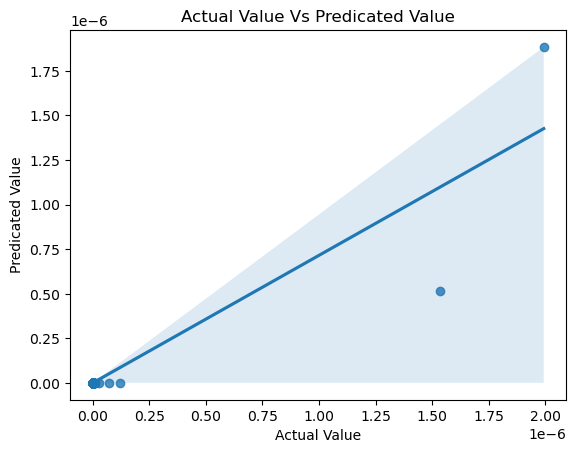

In [101]:
actual_value=y_test
predicted=y_pred
sns.regplot(x=actual_value,y=predicted)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")